## Final Project

Data source:
https://archive.ics.uci.edu/ml/datasets/MiniBooNE+particle+identification

Made for the machine learning course as part of the data science certificate, this project uses data consisting of 50 features of measured signals, identifying each signal as a neutrino particle or background noise. 

Neutrinos are very difficult to detect since they interact very little with matter, and require very large and sensitive detectors. The more sensitive an instrument, the more background noise, so correctly identifying signals allows scientists to pull meaningful information from large and noisy datasets.

The first row of our data has two values, the number of neutrino signals and the number of background events. Below that we have the neutrino rows and then the background rows, both with 50 features. Not much feature transformation here, so this project compares the performance of two models: a random forest classifier (sklearn.ensemble.RandomForestClassifier) and neural network classifier (tensorflow.keras.models.Sequential)

## Importing Data + Assigning a Training and Test Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

#reproducibility
np.random.seed(123)


#create our table of data, exclude the first row 
particle_identification = pd.read_csv('MiniBooNE_PID.txt', skiprows=1, header=None, delim_whitespace=True)

#grab the number of neutrino and background signals from the first row
labels = np.loadtxt('MiniBooNE_PID.txt', usecols=(0,1), dtype=int)
signal, background = labels[0]

particle_identification.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,...,101.174,-31.3730,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,...,186.516,45.9597,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,...,129.931,-11.5608,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,...,163.978,-18.4586,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,...,229.555,42.9600,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893


In [2]:
#label our data, 1 for signal and 0 for background
particle_identification['labels'] = 0
particle_identification.loc[:signal,'labels'] = 1

#create the training and test sets with 80/20 split
target = 'labels'
features = range(50)

from sklearn.model_selection import train_test_split
training, testing = train_test_split(particle_identification, test_size=0.2, random_state=123)

x_train = training[features]
y_train = training[target]

x_test = testing[features]
y_test = testing[target]

print("dataset shape:", particle_identification.shape,
    "\ntraining shape:", x_train.shape, y_train.shape,
     "\ntesting shape:", x_test.shape, y_test.shape)

dataset shape: (130064, 51) 
training shape: (104051, 50) (104051,) 
testing shape: (26013, 50) (26013,)


## Looking at the Training Set

In [3]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
113781,6.08667,1.901430,84.788,0.239360,0.019108,0.127566,1.153770,0.758970,3.84736,0.151012,...,171.665,-17.79030,0.020170,10.20570,0.010616,0.169444,-0.735545,2.94238,1.198250,0.188569
117244,4.07462,1.130100,147.061,0.246624,0.005025,0.141181,0.895764,0.846038,3.50311,0.162632,...,136.197,-27.43950,0.644155,4.91749,0.000000,0.127909,0.146462,1.31436,0.109223,0.224994
120730,4.90690,0.967270,109.646,0.307747,0.000000,0.217703,0.801289,0.856233,3.41168,0.173626,...,166.598,-34.72940,-0.473469,4.95188,0.001484,0.169211,0.060600,1.79664,0.472377,0.256854
78468,6.09699,0.374449,693.649,0.346900,0.011179,0.000000,1.473670,0.853761,3.59591,0.133896,...,174.164,8.76786,-0.384016,4.94336,0.000000,0.114539,0.746638,2.64202,4.957190,0.215420
86659,6.03048,1.546450,127.147,0.325971,0.000000,0.147721,0.744415,0.727355,3.47104,0.160926,...,202.109,-25.56930,-0.352642,3.26569,0.000000,0.173205,0.514645,4.85703,6.030930,0.221028


In [4]:
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,...,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000,104051.000000
mean,1.391436,-1.968469,123.922658,-3.174114,-3.447119,-3.296034,-2.489737,-2.635440,-0.016763,-3.283057,...,141.305164,-25.059731,-2.728531,2.538039,-3.447381,-3.278175,-3.614399,-0.607374,-1.848182,-3.226439
std,58.957217,58.754099,194.270763,58.676803,58.660688,58.669717,58.718091,58.708555,58.863379,58.670370,...,74.283624,66.559500,58.715643,59.189446,58.660678,58.670696,58.658871,58.858996,58.787424,58.673713
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,4.014145,0.877140,49.284250,0.241627,0.000000,0.085343,0.715976,0.783354,3.285645,0.142850,...,122.917000,-40.085750,-0.028701,3.421455,0.000000,0.121924,-0.343828,1.421775,0.273633,0.197400
50%,4.788010,1.382170,106.108000,0.272136,0.004975,0.141268,0.922565,0.833894,3.427120,0.170573,...,145.366000,-21.611500,0.459658,4.766360,0.000000,0.168504,0.042703,2.367630,1.126900,0.231338
75%,5.628740,1.947860,138.801000,0.315113,0.013080,0.212898,1.180470,0.874156,3.585440,0.200056,...,167.018000,-3.313500,1.147920,6.864360,0.001988,0.224723,0.294466,3.778200,2.283790,0.263183
max,17.057300,8.802820,4615.110000,0.736804,0.174658,0.703859,6.241080,0.989713,7.170170,0.524888,...,331.925000,161.298000,43.651200,85.823100,0.416873,0.600906,1.893190,21.768200,22.714200,0.625484


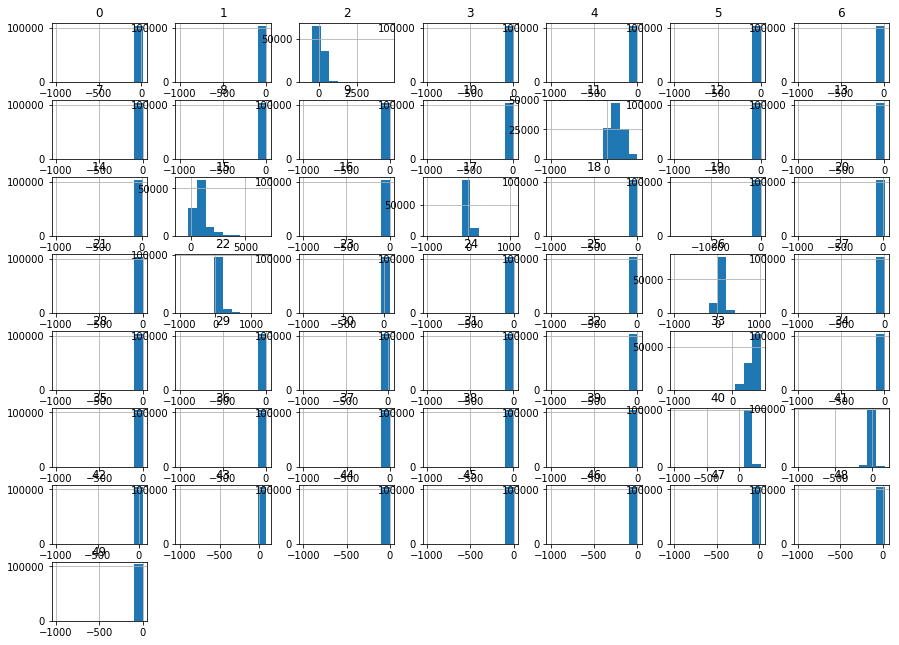

In [5]:
#histograms of each feature

x_train.hist(figsize=(15,11))
plt.show()

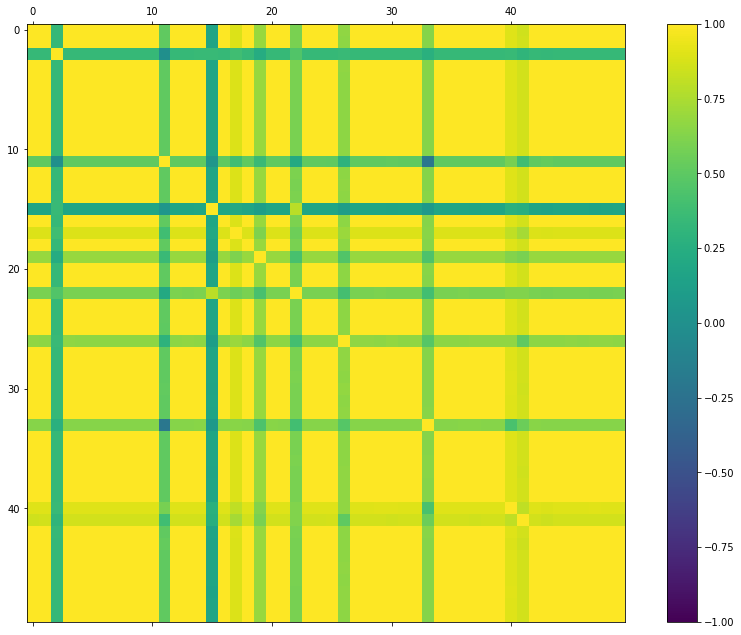

In [6]:
#correlation plot between all the feautures

fig = plt.figure(figsize=(15,11))
ax = fig.add_subplot(111)
cax = ax.matshow(x_train.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

## Transforming the dataset

In [7]:
#scaling the data and replacing the -999.0 values with the mean of each column

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=-999.0, strategy='mean')),
    ('scaler', StandardScaler())
])

x_train_prepped = pipeline.fit_transform(x_train)

In [8]:
# 50 features is a bit much, and by the looks of our correlation plot, we don't need them all
# so we will reduce to 10 dimensions using PCA

#ended up not helping, I did not use this

from sklearn.decomposition import PCA

n = 10

pca = PCA(n_components = n)

x_tr_reduced = pca.fit_transform(x_train_prepped)

## Fine tune Random Forest Classifier

Looks for the best performing (based on accuracy) hyperparameters to fine tune the random forest classifier using both a grid search and a randomized grid search

In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

params = [{'criterion':["gini", "entropy"]}, {'max_depth':[None,10,30,50,70]}, \
          {'min_samples_split':[2,5,20,100,300]}, \
          {'min_samples_leaf':[1,3,5,7,10]}, \
          {'max_leaf_nodes':[None,20,30,40,60]}]

params_scores = []


#evaluate the score of one parameter at a time using grid search
for i in params:
    gridsearch_rfc = GridSearchCV(rfc, i, cv=4, n_jobs=-1, return_train_score=True)
    
    gridsearch_rfc.fit(x_train_prepped, y_train)
    
    params_scores.append(gridsearch_rfc.cv_results_['mean_test_score'])
    
    print("The best score of the random forest classifier when fitting",[key for key in i][0],"is ",\
          gridsearch_rfc.best_score_)
    
    print("Best params: ", gridsearch_rfc.best_params_)

The best score of the random forest classifier when fitting criterion is  0.935637331693112
Best params:  {'criterion': 'entropy'}
The best score of the random forest classifier when fitting max_depth is  0.9355604463195932
Best params:  {'max_depth': None}
The best score of the random forest classifier when fitting min_samples_split is  0.9352913475122776
Best params:  {'min_samples_split': 2}
The best score of the random forest classifier when fitting min_samples_leaf is  0.9345032724337103
Best params:  {'min_samples_leaf': 1}
The best score of the random forest classifier when fitting max_leaf_nodes is  0.9352336834821385
Best params:  {'max_leaf_nodes': None}


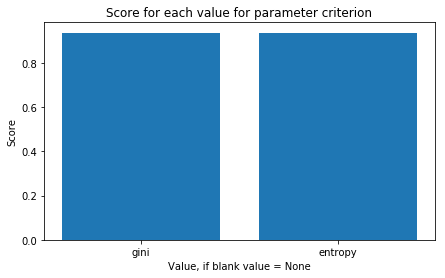

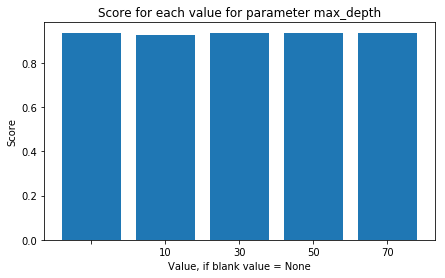

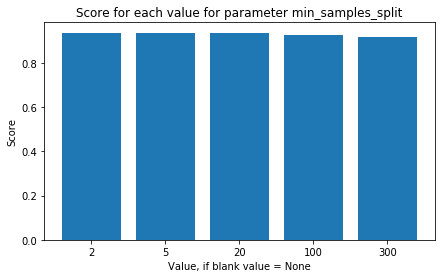

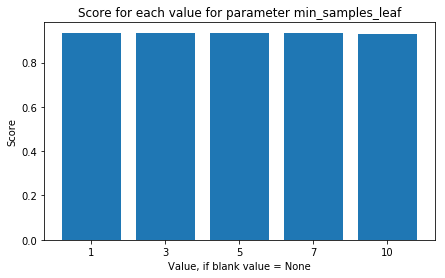

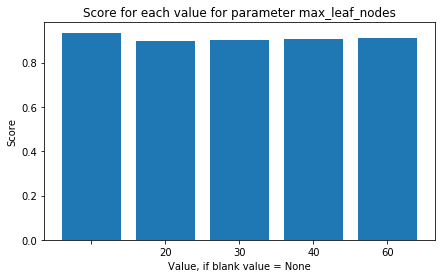

In [10]:
#plots

for i in range(len(params)):
    
    #take values and key names from dictionary
    vals = list(params[i].values())[0]
    keys = list(params[i].keys())[0]
    
    scores = params_scores[i]
    
    
    
    #each plot
    plt.figure(figsize=(7,4))
    
    plt.bar(range(len(scores)), scores, align='center')
    plt.xticks(range(len(scores)), vals)
    
    plt.title("Score for each value for parameter %s"%(keys))
    plt.ylabel("Score")
    plt.xlabel("Value, if blank value = None")
    
    plt.show()

In [11]:
#tune all parameters using randomized search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

#parameters were selected based on the max scores in the plots

params_grid = {'max_depth':[50,70,90], \
          'min_samples_leaf':[1,3,5,7,10], \
          'max_leaf_nodes':[None,40,80,120]}

params_distr = {'max_depth': randint(low=20, high=90), \
                'min_samples_leaf': randint(low=1, high=10), \
                'max_leaf_nodes': randint(low=0,high=120)}

In [12]:
#search using a coarse grid first

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(n_estimators = 100, criterion='entropy', min_samples_split=7)

coarse_grid = GridSearchCV(rfc, params_grid, cv=4, n_jobs=-1)

coarse_grid.fit(x_train_prepped, y_train)

print("The best score of the random forest classifier when fitting all parameters is ",\
      coarse_grid.best_score_)

print("Best params: ", coarse_grid.best_params_)

The best score of the random forest classifier when fitting all parameters is  0.9359833158739465
Best params:  {'max_depth': 50, 'max_leaf_nodes': None, 'min_samples_leaf': 1}


In [13]:
#search using randomized search

rand_search = RandomizedSearchCV(rfc, params_distr, cv=3, n_jobs=-1)

rand_search.fit(x_train_prepped, y_train)

print("The best score of the decision tree classifier when fitting all parameters is ",\
      rand_search.best_score_)

print("Best params: ", rand_search.best_params_)

The best score of the decision tree classifier when fitting all parameters is  0.9160315614458294
Best params:  {'max_depth': 88, 'max_leaf_nodes': 113, 'min_samples_leaf': 3}


## Out of sample performance of Random Forest Classifier

In [14]:
#we will use accuracy to measure the performance since this is a binary classification model
from sklearn.metrics import accuracy_score

#evaluate on the test set

x_test_prepped = pipeline.transform(x_test)

final_rfp = coarse_grid.best_estimator_
rf_pred = final_rfp.predict(x_test_prepped)

test_acc = accuracy_score(y_test, rf_pred)

print("The accuracy of our random forest classifier (using the best parameters according to grid search) is", test_acc)

The accuracy of our random forest classifier (using the best parameters according to grid search) is 0.9368008303540537


In [15]:
final_rfp = rand_search.best_estimator_
rf_pred = final_rfp.predict(x_test_prepped)

test_acc = accuracy_score(y_test, rf_pred)

print("The accuracy of our random forest classifier (using best parameters according to random search) is", test_acc)

The accuracy of our random forest classifier (using best parameters according to random search) is 0.9147349402221966


## Neural Network Classifier

In [16]:
import tensorflow as tf
from tensorflow import keras

x_train_prepped.shape

(104051, 50)

In [17]:
#binary model: using logistic activation, 1 output neuron

nn_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


nn_model.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

nn_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 300)               15300     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 45,501
Trainable params: 45,501
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = nn_model.fit(x_train_prepped, y_train, epochs=30)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
104051/104051 [==============================] - 7s 69us/sample - loss: 0.2254 - acc: 0.9124
Epoch 2/30
104051/104051 [==============================] - 7s 65us/sample - loss: 0.1707 - acc: 0.9335
Epoch 3/30
104051/104051 [==============================] - 6s 62us/sample - loss: 0.1577 - acc: 0.9384
Epoch 4/30
104051/104051 [==============================] - 7s 72us/sample - loss: 0.1504 - acc: 0.9407
Epoch 5/30
104051/104051 [==============================] - 8s 81us/sample - loss: 0.1452 - acc: 0.9434
Epoch 6/30
104051/104051 [==============================] - 9s 87us/sample - loss: 0.1415 - acc: 0.9444
Epoch 7/30
104051/104051 [==============================] - 8s 79us/sample - loss: 0.1384 - acc: 0.9460
Epoch 8/30
104051/104051 [==============================] - 8s 80us/sample - loss: 0.1358 - acc: 0.9466
Epoch 9/30
104051/104051 [==============================] - 8s 77us/sample - loss: 0.1337 - acc: 0.9477
Epoch 10/30
1040

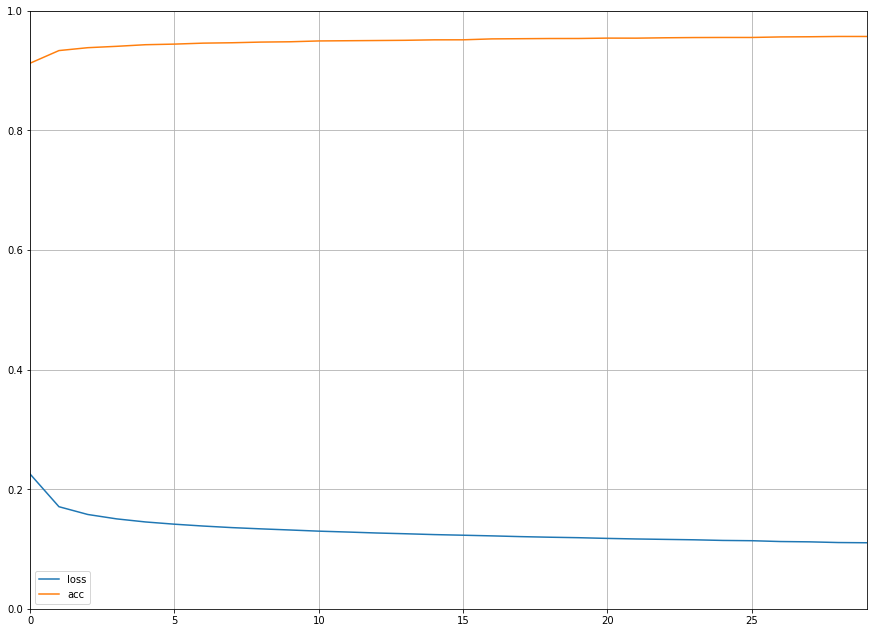

In [19]:
pd.DataFrame(history.history).plot(figsize=(15,11))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [20]:
#fit the model a bit more

history = nn_model.fit(x_train_prepped, y_train, epochs=15)

Epoch 1/15
104051/104051 [==============================] - 8s 79us/sample - loss: 0.1095 - acc: 0.9577
Epoch 2/15
104051/104051 [==============================] - 8s 78us/sample - loss: 0.1086 - acc: 0.9581
Epoch 3/15
104051/104051 [==============================] - 8s 82us/sample - loss: 0.1078 - acc: 0.9581
Epoch 4/15
104051/104051 [==============================] - 8s 81us/sample - loss: 0.1071 - acc: 0.9593
Epoch 5/15
104051/104051 [==============================] - 8s 76us/sample - loss: 0.1066 - acc: 0.9586
Epoch 6/15
104051/104051 [==============================] - 8s 80us/sample - loss: 0.1057 - acc: 0.9594
Epoch 7/15
104051/104051 [==============================] - 8s 75us/sample - loss: 0.1052 - acc: 0.9591
Epoch 8/15
104051/104051 [==============================] - 8s 78us/sample - loss: 0.1043 - acc: 0.9595
Epoch 9/15
104051/104051 [==============================] - 8s 77us/sample - loss: 0.1037 - acc: 0.9595
Epoch 10/15
104051/104051 [==============================] - 8s 

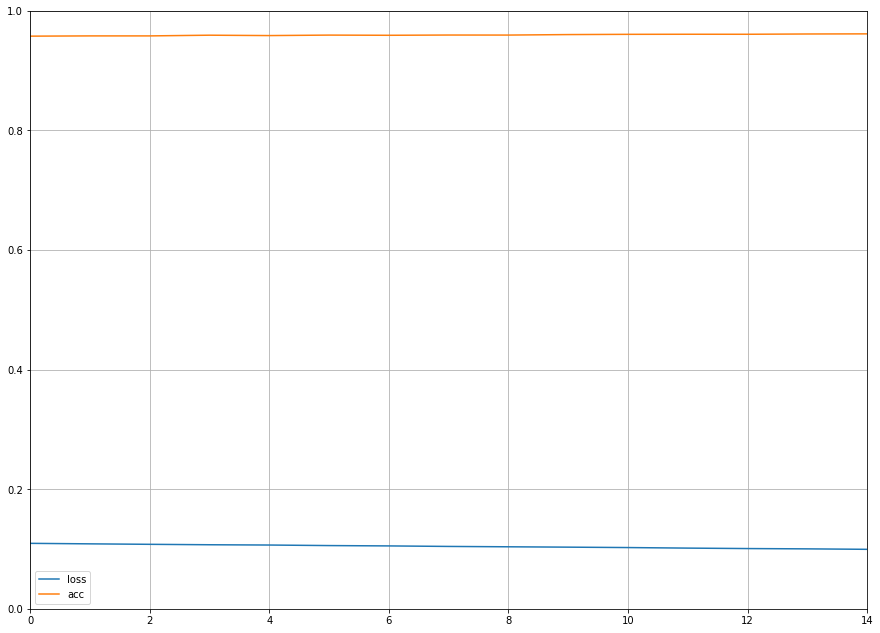

In [21]:
#plotting the second half of our fit, it looks okay since it plateaus

pd.DataFrame(history.history).plot(figsize=(15,11))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Out of sample performance of NN model

In [22]:
print("The out of sample accuracy of our neural network model is ",nn_model.evaluate(x_test_prepped, y_test)[1])

26013/26013 [==============================] - 1s 41us/sample - loss: 0.1355 - acc: 0.9492
The out of sample accuracy of our neural network model is  0.94917923


## Comparison of the two models

Since the labels of our dataset are either signal or background, this is a binary classification problem, and therefore the performance of both models were measured using their accuracy. Both models were pretty accurate, with the random forest classifier at 93.68% and the neural network at 94.92%, but training the neural network model was much, much quicker and required less lines of code, making it more practical to use and therefore preferred. 